Importing libraries and setting up aliases

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from scipy.stats import chi2_contingency
from imblearn.over_sampling import RandomOverSampler

Creating a custom ridge regression class with methods for fitting, predicting, and scoring

In [2]:
class CustomRidge:
  def __init__(self,alpha=0.1):
    self.alpha=alpha
    self.coef_=None
    self.intercept_=None
  def fit(self,X_train,y_train):
    X_train=np.insert(X_train,0,1,axis=1)
    I=np.identity(X_train.shape[1])
    I[0][0]=0
    result=np.linalg.inv(np.dot(X_train.T,X_train)+self.alpha*I).dot(X_train.T).dot(y_train)
    self.intercept_=result[0]
    self.coef_=result[1:]
  def predict(self,X_test):
    return np.dot(X_test,self.coef_)+self.intercept_
  def score(self,X_test,y_test):
    y_pred=self.predict(X_test)
    residual=y_test-y_pred
    ssr=np.sum(residual**2)
    sst=np.sum(y_test-np.mean(y_test)**2)
    r2_score=1-(ssr/sst)
    return r2_score


Reading a CSV file

In [3]:
sales=pd.read_csv("/content/Video_Games_Sales_as_at_22_Dec_2016.csv")

Displaying the first five rows of the dataset

In [4]:
sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Filtering a dataset and creating a joint plot

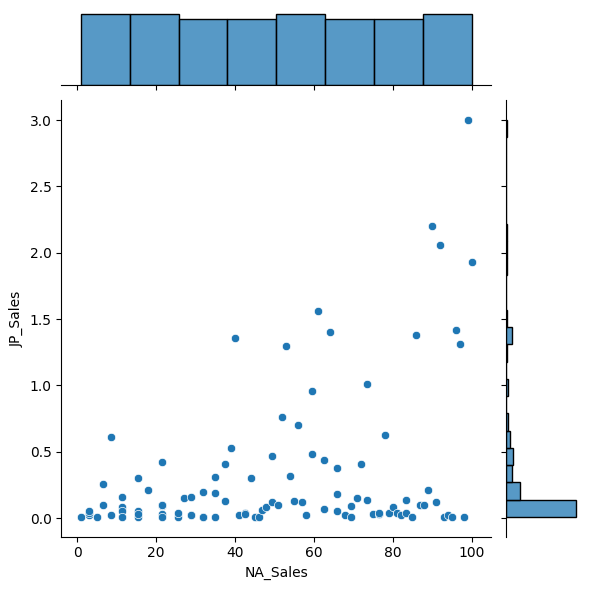

In [5]:
s = sales[(sales.NA_Sales.notnull() & sales.JP_Sales.notnull())]
s = sales[((sales.NA_Sales > 0) & (sales.JP_Sales > 0))]
s = s.sample(100, random_state=0)
s = s.loc[s.NA_Sales.rank().sort_values().index]
sns.jointplot(x=s.NA_Sales.rank(),y=s.JP_Sales,data=sales)

Inference:

The above joint plot shows the relation between the Japan sales and North America sales.

 Here,as the North America's sales increases,the Japan's sales also increases

Creating numpy arrays

Returning the number of rows and columns in a datset

In [6]:
sales.shape

(16719, 16)

Describing the columns in a dataset

#**Description of columns**

Name-->Name of the game

Platform-->Platform on which the game is running

Year_of_Release-->Year of the game released

Genre-->Game's category

Publisher-->Publisher of the game

NA_Sales-->Game sales in North America

EU_Sales-->Game sales in European Union

JP_Sales-->Game sales in Japan

Other_Sales-->Games sales in the rest of the world

Global_Sales-->Total sales in the world

Critic_Score-->Numerical rating or evaluation given by professional critics

Critic_Count-->Number of professional critics who have reviewed

User_Score-->Numerical rating given by the user

User_Count-->Number of users who have reviewed

Developer-->Developer of the game

Rating-->Numerical or descriptive measure that quantifies the game


Assigning the target variable for prediction

In [7]:
target_variable = 'Rating'

Assigning the feature columns for prediction

In [8]:
feature_columns = ['Name', 'Platform', 'Year_of_Release','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score','Critic_Count','User_Score','Developer']

Providing summary of the dataset including data types, non-null counts, and memory usage

Columns and their data types

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Generating a transposed summary statistics table for the dataset including count, mean, standard deviation, minimum, and maximum values for numerical columns

In [10]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


Displaying the count of missing values for each column in the dataset

In [11]:
sales.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Printing the total number of duplicate rows in the dataset

In [12]:
print(f'Total duplicate rows: {sales.duplicated().sum()}')

Total duplicate rows: 0


Displaying the count of unique values for each column in the dataset

In [13]:
sales.nunique()

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count           888
Developer           1696
Rating                 8
dtype: int64

Defining a custom encoder class which fits and transforms categorical columns in a dataset

In [14]:
class CustomEncoder:
    def __init__(self):
        self.label_maps = {}

    def fit(self, df, columns):
        for column in columns:
            unique_values = df[column].unique()
            self.label_maps[column] = {value: index for index, value in enumerate(unique_values)}

    def transform(self, df, columns):
        for column in columns:
            df[column] = df[column].map(self.label_maps[column])
        return df

    def fit_transform(self, df, columns):
        self.fit(df, columns)
        return self.transform(df, columns)

Creating a new instance of the custom encoder class and assigning the value to the variable 'encoder'

In [15]:
encoder = CustomEncoder()

Creating a list of columns that are to be encoded

In [16]:
columns_to_encode = ['Name', 'Platform','Genre','Publisher','User_Score','Developer','Rating']

Encoding some columns using custom encoder

In [17]:
df_encoded = encoder.fit_transform(sales, columns_to_encode)
sales=df_encoded

Creating a heatmap to visualize the presence of null values

<Axes: >

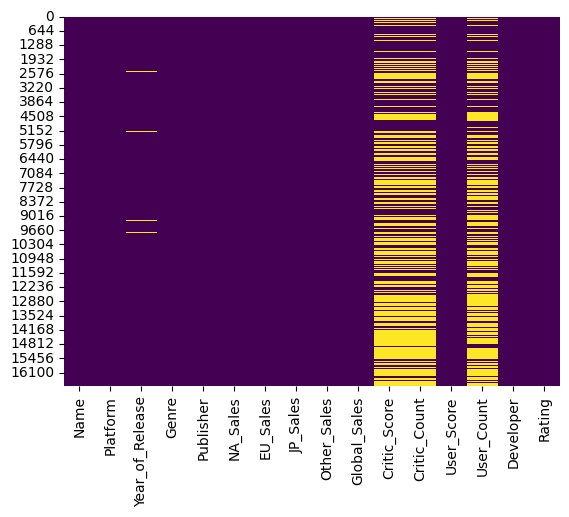

In [18]:
sns.heatmap(sales.isnull(), cmap='viridis', cbar=False)

Inference:

The following columns consists of null values,

1.Year_of_Release

2.Critic_Score

3.Critic_Count

4.User_Count

Creating count plots for each column with respect to the 'Rating' column

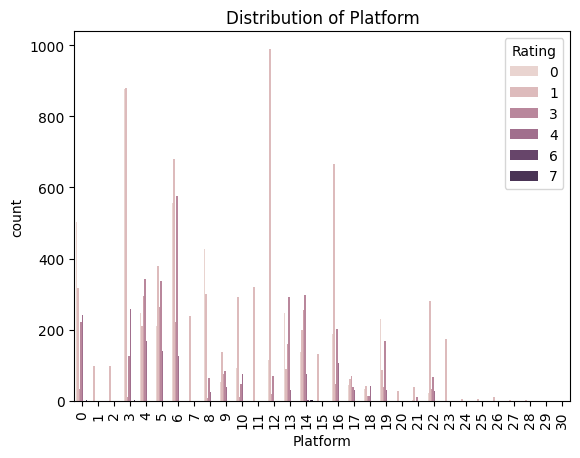

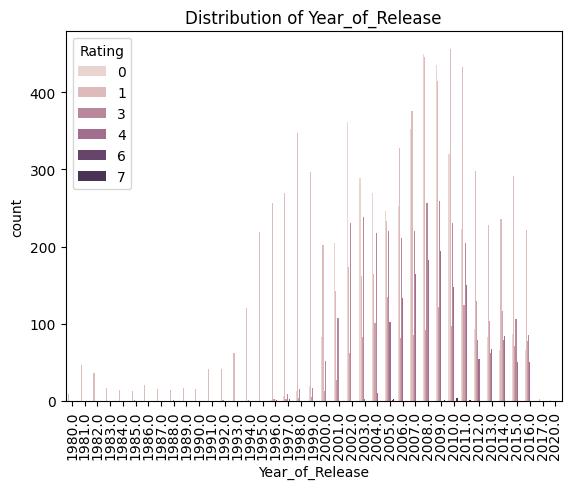

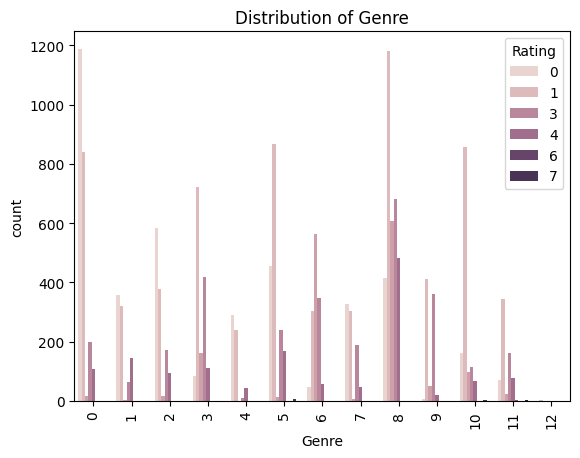

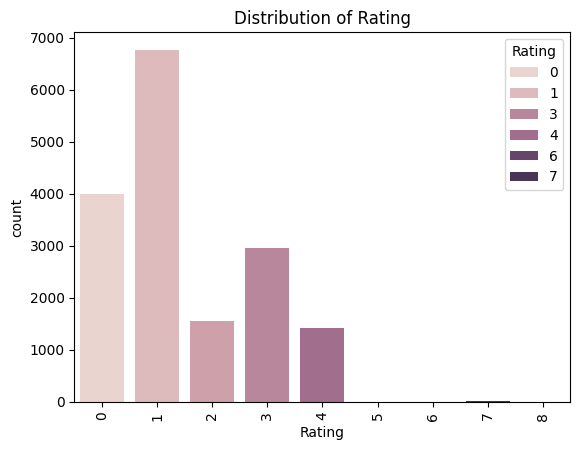

In [19]:
df_dropna=sales.dropna()
selected_df=df_dropna.drop(['Name','Publisher','NA_Sales','EU_Sales','JP_Sales'
,'Other_Sales','Global_Sales','Critic_Score','User_Score','Critic_Count','User_Count','Developer'], axis=1)
for col in selected_df.columns:
    sns.countplot(x=col,hue='Rating', data=sales)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

Filling null values with mean

In [20]:
df_filled_mean = sales.fillna(sales.mean())

Filling null values with median

In [21]:
df_filled_median = sales.fillna(sales.median())

Filling null values with mode

In [22]:
df_filled_mode = sales.fillna(sales.mode().iloc[0])

Filling null values with standard deviation

In [23]:
df_filled_std = sales.fillna(sales.std())

Instantiating a k-Nearest Neighbors (KNN) imputer with 5 neighbors

In [24]:
knn_imputer = KNNImputer(n_neighbors=5)


Filling null values with k-Nearest Neighbors imputer

In [25]:
df_filled_knn = pd.DataFrame(knn_imputer.fit_transform(sales), columns=sales.columns)

Analyzing whether the class is balanced or not

Visualizing through count plot

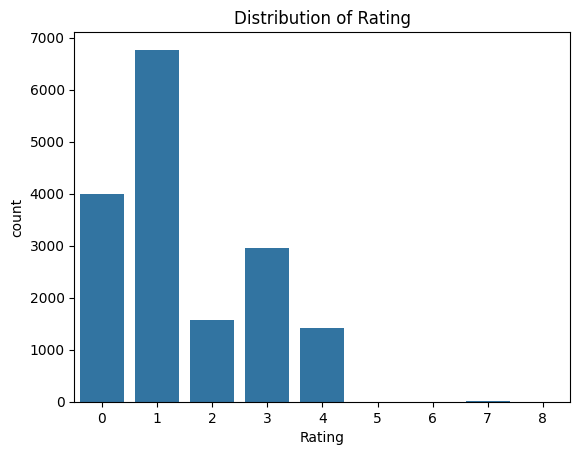

In [26]:
sns.countplot(x='Rating', data=sales)
plt.title('Distribution of Rating')
plt.show()


Inference:

Rating '1' has the highest count

Summary of the target variable

In [27]:
print(sales['Rating'].value_counts())

1    6769
0    3991
3    2961
2    1563
4    1420
7       8
5       3
8       3
6       1
Name: Rating, dtype: int64


Percentage of each class in the target variable

In [28]:
class_percentage = sales['Rating'].value_counts(normalize=True) * 100
print(class_percentage)

1    40.486871
0    23.871045
3    17.710389
2     9.348645
4     8.493331
7     0.047850
5     0.017944
8     0.017944
6     0.005981
Name: Rating, dtype: float64


Finding the imbalance ratio

In [29]:
imbalance_ratio = sales['Rating'].value_counts()[1] / sales['Rating'].value_counts()[0]
print(f"Imbalance Ratio: {imbalance_ratio}")

Imbalance Ratio: 1.6960661488348785


Visualizing Imbalance through pie chart

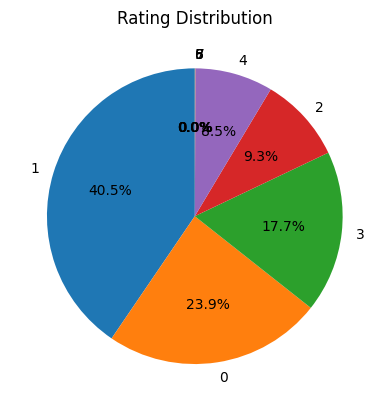

In [30]:
plt.pie(class_percentage, labels=class_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Rating Distribution')
plt.show()

Inference:

The dataset is imbalanced


Conducting statistical tests

In [31]:
contingency_table = pd.crosstab(sales['Rating'], columns='count')
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

Chi-square statistic: 0.0, p-value: 1.0


Filling the specified column's null values with the median value

In [32]:
columns_to_fill=['Name','Year_of_Release','Genre','Publisher','Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating']
for column_name in columns_to_fill:
    # Calculate the median of the column
    median_value = sales[column_name].median()

    # Fill null values in the column with the calculated median
    sales[column_name].fillna(median_value, inplace=True)

Calculating and displaying the count of null values for each column

In [33]:
sales.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

Generating a heatmap visualization of the correlation matrix

<Axes: >

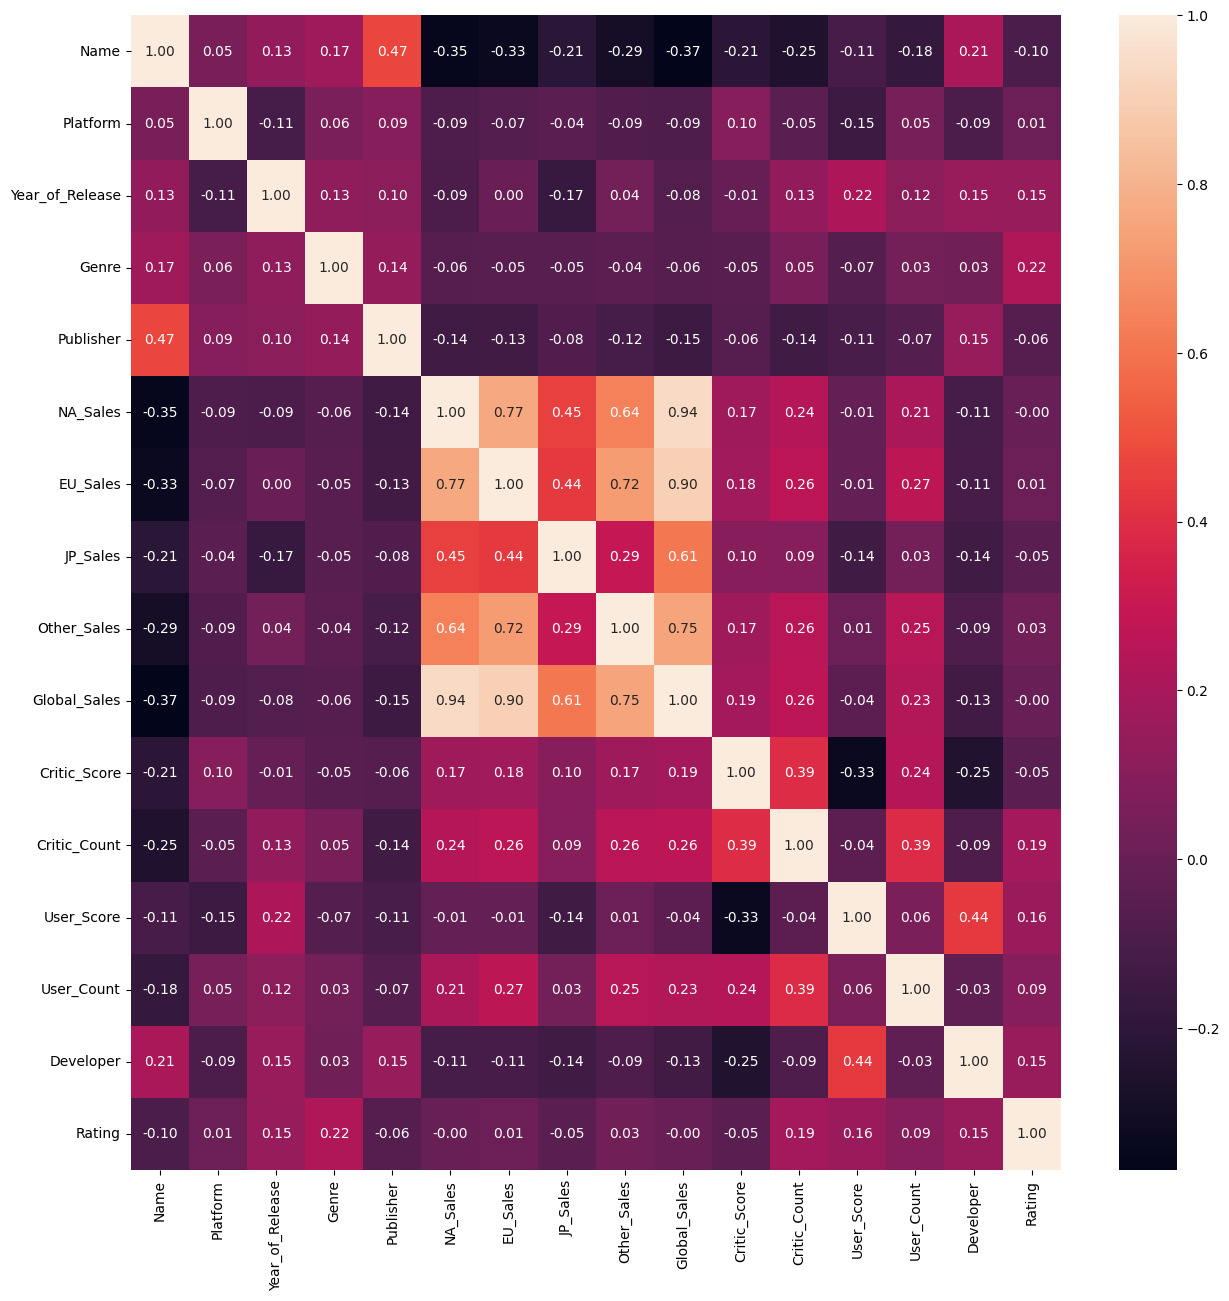

In [34]:
corelation=sales.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True,fmt=".2f")

Inference:

The columns 'Platform','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score'and 'User_Count' has less correlation with the target variable

Removing some columns based on relations in the correlation matrix heatmap

In [35]:
dropcolumns=['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Publisher','Critic_Score','User_Count']
sales = sales.drop(dropcolumns, axis=1)

Generating a heatmap visualizing the correlation matrix after dropping some specific columns

<Axes: >

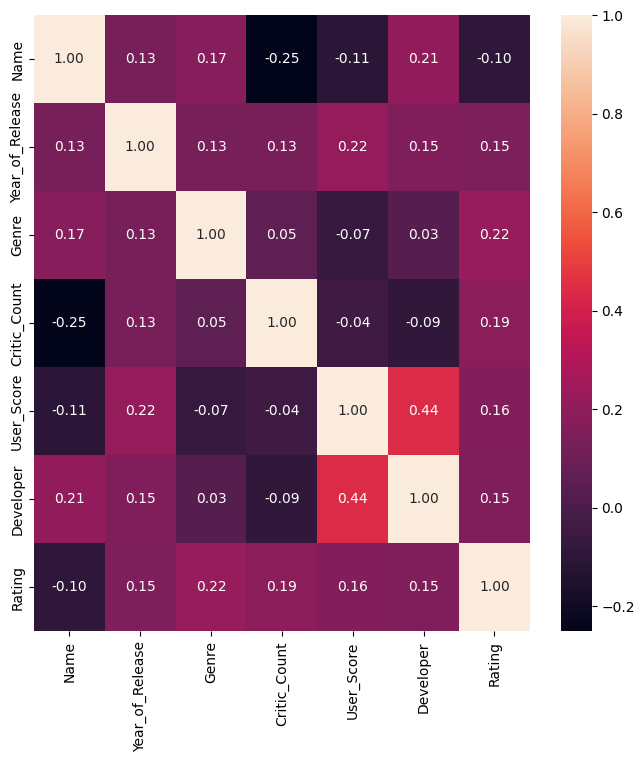

In [36]:
corelation=sales.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True,fmt=".2f")

Classifying the columns as categorical and numerical

In [37]:
categorical_cols = ['Rating','Genre','Year_of_Release', 'User_Score']
numerical_cols = [ 'Name','Developer','Critic_Count']

Generating a pairplot for the dataset with the hue as 'JP_Sales'

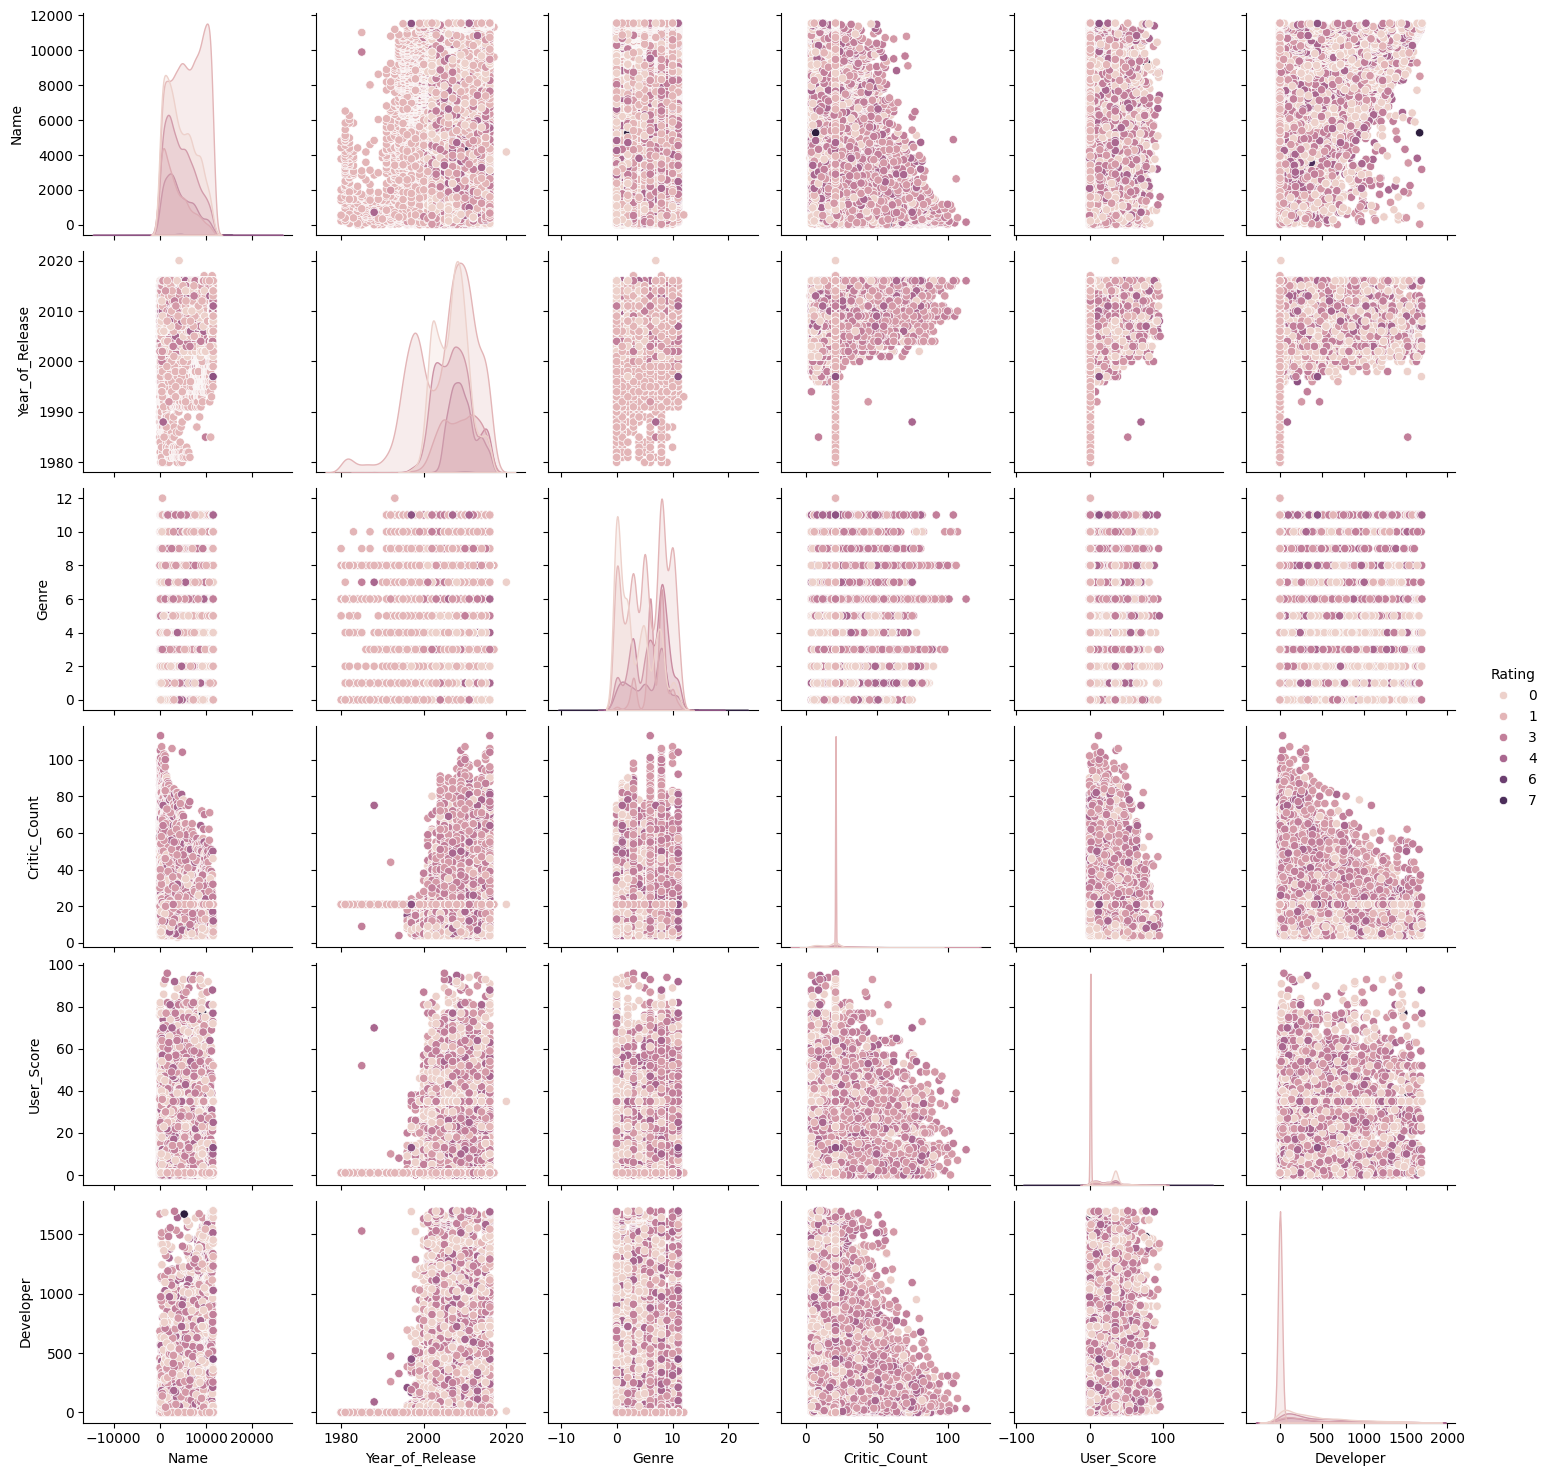

In [38]:
sns.pairplot(sales,hue='Rating')

Inference:

The dataset is uniformly distributes which means it can be applied for predictions and it will obtain good  model

Creating input feature and target variable arrays for the prediction

In [39]:
X=sales.drop(['Rating'],axis=1)
y=sales['Rating']
X=X.to_numpy()
y=y.to_numpy()
X,y

(array([[0.0000e+00, 2.0060e+03, 0.0000e+00, 5.1000e+01, 0.0000e+00,
         0.0000e+00],
        [1.0000e+00, 1.9850e+03, 1.0000e+00, 2.1000e+01, 1.0000e+00,
         1.0000e+00],
        [2.0000e+00, 2.0080e+03, 2.0000e+00, 7.3000e+01, 2.0000e+00,
         0.0000e+00],
        ...,
        [1.1562e+04, 2.0160e+03, 1.0000e+01, 2.1000e+01, 1.0000e+00,
         1.0000e+00],
        [1.0879e+04, 2.0030e+03, 1.0000e+00, 2.1000e+01, 1.0000e+00,
         1.0000e+00],
        [1.0743e+04, 2.0160e+03, 7.0000e+00, 2.1000e+01, 1.0000e+00,
         1.0000e+00]]),
 array([0, 1, 0, ..., 1, 1, 1]))

In [40]:
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X, y)
X,y=X_resampled, y_resampled

Splitting the target and feature variables as test and train sets

In [41]:
def custom_train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    num_samples = len(X)

    num_test_samples = int(test_size * num_samples)

    test_indices = np.random.choice(num_samples, size=num_test_samples, replace=False)

    mask_train = np.ones(num_samples, dtype=bool)
    mask_train[test_indices] = False

    X_train, X_test = X[mask_train], X[~mask_train]
    y_train, y_test = y[mask_train], y[~mask_train]

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.3, random_state=42)

Standardizing the training and testing dataset target and feature columns

In [42]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()



Creating an instance of the RidgeRegression class and assigning it to a variable 'model'

In [43]:
model = CustomRidge()

Training the linear regression model using the scaled training data

In [44]:
model.fit(X_train_scaled, y_train_scaled)

Generating predictions using the trained linear regression model,inversely transforming the scaled predictions and assigning the results to 'predictions'

In [45]:
predictions = model.predict(X_test_scaled)
predictions= scaler_y.inverse_transform(predictions.reshape(-1, 1))
predictions = np.squeeze(predictions)
predictions,y_test

(array([3.41004528, 4.87019579, 4.51841082, ..., 5.22334784, 5.22334784,
        5.22334784]),
 array([0, 0, 0, ..., 6, 6, 6]))

Printing the predictions

In [46]:
print("Predictions:", predictions)

Predictions: [3.41004528 4.87019579 4.51841082 ... 5.22334784 5.22334784 5.22334784]


Printing the Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared Score for the custom linear regression model's predictions

In [47]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,predictions)
mse=mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 1.06
Mean Squared Error (MSE): 1.85
Root Mean Squared Error (RMSE): 1.36
R-squared (R2) Score: 0.65


Implementing sklearn's linear regression model

In [48]:
from sklearn.linear_model import Ridge
import numpy as np

# Create and train the Ridge regression model
alpha = 0.1  # Regularization strength (adjust as needed)
ridge_regr = Ridge(alpha=alpha)
ridge_regr.fit(X_train, y_train)

# Make predictions on the test set
predictions_ridge = ridge_regr.predict(X_test)

# Print predictions and actual values
print("Ridge Regression Predictions:", predictions_ridge)
print("Actual Values:", y_test)


Ridge Regression Predictions: [3.41004972 4.87021155 4.51842316 ... 5.22335711 5.22335711 5.22335711]
Actual Values: [0 0 0 ... 6 6 6]


Printing the Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared Score for the sklearn's linear regression model's predictions

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae1 = mean_absolute_error(y_test, predictions_ridge)
mse1= mean_squared_error(y_test, predictions_ridge)
rmse1 = mean_squared_error(y_test, predictions_ridge, squared=False)
r21 = r2_score(y_test, predictions_ridge)

print(f"Mean Absolute Error (MAE): {mae1:.2f}")
print(f"Mean Squared Error (MSE): {mse1:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse1:.2f}")
print(f"R-squared (R2) Score: {r21:.2f}")

Mean Absolute Error (MAE): 1.06
Mean Squared Error (MSE): 1.85
Root Mean Squared Error (RMSE): 1.36
R-squared (R2) Score: 0.65
